In [1]:
from sympy import *
from fractions import Fraction as frac
from IPython.display import display as ds

init_printing(use_latex='mathjax')

# Optimal PO Allocation of Available Goods Across Consumers

Suppose you are a central planner with perfect information. Instead of each agent possesing an initial set of endowments you take all the resources of the economy. Your goal is to conduct the redistribution such that you maximize the utility of one of the agents subject to a required level of utility of the other agents. Because you are not subject to a budget constraint there are no prices; you are only subject to feasibility in the economy, which here are the total goods that the agents have given you.

We will adapt Problem 1 and 3 of P.S. 5 for this problem where we maximize Agent 1's utility subject to maintaining Agent 2's utility at a given level, $\bar{u}_{2}$. This is a "normative" solution as we make a statement about what an agent's utility SHOULD be (here agent 2's) to determine allocations; contrast this with the "positive" solution, where we let markets determine allocations and allow agents to maximize their own utilities. 

The problem is the following

\begin{align*}
\max_{x}\quad &\left(x_{11}\right)^{\frac{1}{3}}\left(x_{12}\right)^{\frac{2}{3}} \\
&\text{s.t.}\quad \left(x_{21}\right)^{\frac{1}{2}}\left(x_{22}\right)^{\frac{1}{2}}\geq \bar{u}_{2}\\
&\quad \quad \sum_{i}{x_{1,i}}\leq3\\
&\quad \quad \sum_{i}{x_{2,i}}\leq3
\end{align*}

Since we know that feasibility must be attained and this constraint set is strictly convex, we can set these constraints with equality since we know we will have an interior solution and that it will be unique (that is, we satisfy the necessary and sufficient conditions of a quasi-concave objective function and a convex constraint set).

In [2]:
x12,x11,x21,x22,u2,lam = (
    symbols('x_{12} x_{11} x_{21} x_{22} u_{2} \lambda'))

Agent 1's utility:

In [3]:
u_1 = (x11)**frac('1/3')*(x12)**frac('2/3')
ds(u_1)

3 ________       2/3
╲╱ x_{11} ⋅x_{12}   

Agent 2's utility as the contraint:

In [4]:
u_2 = (3-x11)**frac('1/2')*(3-x12)**frac('1/2') -u2
ds(u_2)

           _____________   _____________
-u_{2} + ╲╱ -x_{11} + 3 ⋅╲╱ -x_{12} + 3 

Define the Lagrangian

In [5]:
L = u_1 + lam*(u_2)
ds(L)

        ⎛           _____________   _____________⎞   3 ________       2/3
\lambda⋅⎝-u_{2} + ╲╱ -x_{11} + 3 ⋅╲╱ -x_{12} + 3 ⎠ + ╲╱ x_{11} ⋅x_{12}   

Calculate $\frac{\partial \mathcal{L}}{\partial x_{11}}$

In [6]:
dLdx11 = diff(L,x11)
ds(dLdx11)

            _____________          2/3 
  \lambda⋅╲╱ -x_{12} + 3     x_{12}    
- ─────────────────────── + ───────────
         _____________              2/3
     2⋅╲╱ -x_{11} + 3       3⋅x_{11}   

Calculate $\frac{\partial \mathcal{L}}{\partial x_{12}}$

In [7]:
dLdx12 = diff(L,x12)
ds(dLdx12)

            _____________     3 ________
  \lambda⋅╲╱ -x_{11} + 3    2⋅╲╱ x_{11} 
- ─────────────────────── + ────────────
         _____________        3 ________
     2⋅╲╱ -x_{12} + 3       3⋅╲╱ x_{12} 

Solve for $\lambda$ in both equations to generate the MRS in SymPy

In [8]:
lam1 = solve(dLdx11,lam)[0]
lam2 = solve(dLdx12,lam)[0]
ds(lam1,lam2)

        2/3   _____________
2⋅x_{12}   ⋅╲╱ -x_{11} + 3 
───────────────────────────
        2/3   _____________
3⋅x_{11}   ⋅╲╱ -x_{12} + 3 

  3 ________   _____________
4⋅╲╱ x_{11} ⋅╲╱ -x_{12} + 3 
────────────────────────────
  3 ________   _____________
3⋅╲╱ x_{12} ⋅╲╱ -x_{11} + 3 

So we have:

\begin{align*}
\lambda &= \frac{2 x_{12}^{\frac{2}{3}} \sqrt{- x_{11} + 3}}{3 x_{11}^{\frac{2}{3}} \sqrt{- x_{12} + 3}}\\
\lambda &= \frac{4 \sqrt[3]{x_{11}} \sqrt{- x_{12} + 3}}{3 \sqrt[3]{x_{12}} \sqrt{- x_{11} + 3}}
\end{align*}

Take the ratios and we get this equation

\begin{equation*}
0= 1 - \frac{\frac{2 x_{12}^{\frac{2}{3}} \sqrt{- x_{11} + 3}}{3 x_{11}^{\frac{2}{3}} \sqrt{- x_{12} + 3}}}{\frac{4 \sqrt[3]{x_{11}} \sqrt{- x_{12} + 3}}{3 \sqrt[3]{x_{12}} \sqrt{- x_{11} + 3}}}
\end{equation*}

We can then solve for both $x_{11}^{*}$ and $x_{12}^{*}$ in terms of the other in SymPy

In [9]:
x11_star = solve((lam1/lam2)-1,x11)[0]
x12_star = solve((lam1/lam2)-1,x12)[0]
ds(x11_star,x12_star)

-3⋅x_{12} 
──────────
x_{12} - 6

 6⋅x_{11} 
──────────
x_{11} + 3

So we have that

\begin{align*}
x_{11}^{*} &= \frac{3 x_{12}^{*}}{6-x_{12}^{*}} \\
x_{12}^{*} &= \frac{6 x_{11}^{*}}{x_{11}^{*} + 3}
\end{align*}

Now we can place them back into our constraint to then solve for the values in terms of Agent 2's base utility $\bar{u}_{2}$.

In [10]:
at_x12 = u_2.subs(x11,x11_star)
at_x11 = u_2.subs(x12,x12_star)
ds(at_x12,at_x11)

                             ________________
           _____________    ╱  3⋅x_{12}      
-u_{2} + ╲╱ -x_{12} + 3 ⋅  ╱  ────────── + 3 
                         ╲╱   x_{12} - 6     

                             __________________
           _____________    ╱    6⋅x_{11}      
-u_{2} + ╲╱ -x_{11} + 3 ⋅  ╱  - ────────── + 3 
                         ╲╱     x_{11} + 3     

So we get 
\begin{align*}
\bar{u}_{2} &= \sqrt{- x_{12} + 3} \sqrt{\frac{3 x_{12}}{x_{12} - 6} + 3} \\
\bar{u}_{2} &= \sqrt{- x_{11} + 3} \sqrt{- \frac{6 x_{11}}{x_{11} + 3} + 3}
\end{align*}

We will obtain two possible solutions when we solve for $x_{12}$ and $x_{11}$. So we need to find which one is the correct solution (that is, which one is the one that satisfies that $\bar{u}_{2}\in[0,3]$).

Solutions for $x_{12}^{*}$ (in order)

In [11]:
x12_1,x12_2 = solve(at_x12,x12)
ds(x12_1,x12_2)

                    _____________    
       2           ╱      2          
  u_{2}    u_{2}⋅╲╱  u_{2}  + 72     
- ────── - ────────────────────── + 3
    12               12              

                    _____________    
       2           ╱      2          
  u_{2}    u_{2}⋅╲╱  u_{2}  + 72     
- ────── + ────────────────────── + 3
    12               12              

Solutions for $x_{11}^{*}$ (in order)

In [12]:
x11_1,x11_2 = solve(at_x11,x11)
ds(x11_1,x11_2)

                  _____________    
     2           ╱      2          
u_{2}    u_{2}⋅╲╱  u_{2}  + 72     
────── - ────────────────────── + 3
  6                6               

                  _____________    
     2           ╱      2          
u_{2}    u_{2}⋅╲╱  u_{2}  + 72     
────── + ────────────────────── + 3
  6                6               

I now plot the solutions to see which one fits the constraint of possible utility levels.

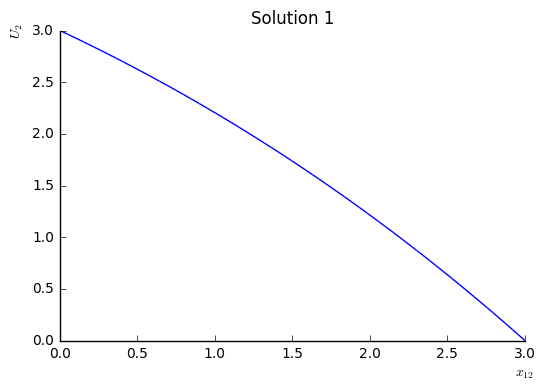

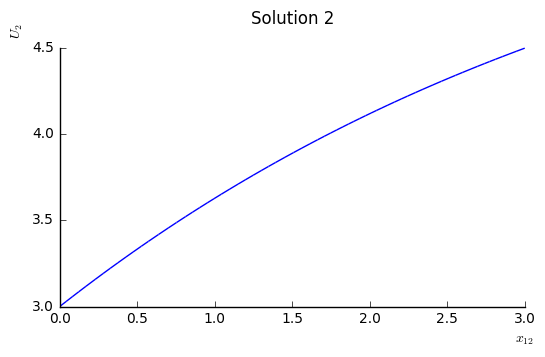

In [13]:
x12_1_plot = plot(x12_1, (u2, 0, 3), title=('Solution 1'),
                  xlabel="$x_{12}$",ylabel="$U_{2}$")
x12_2_plot = plot(x12_2, (u2, 0, 3), title=('Solution 2'),
                  xlabel="$x_{12}$",ylabel="$U_{2}$",
                  axis_center=(0,3))

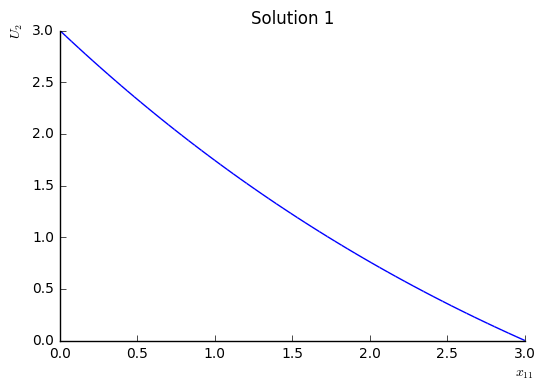

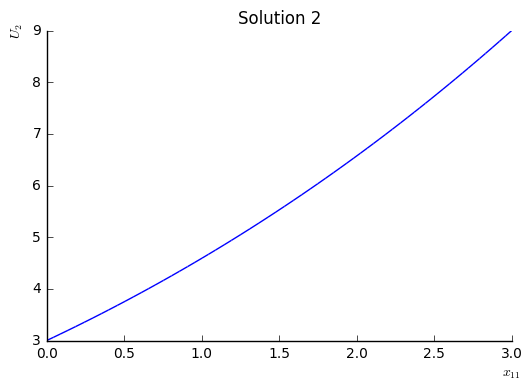

In [14]:
x11_1_plot = plot(x11_1, (u2, 0, 3), title=('Solution 1'),
                  xlabel="$x_{11}$",ylabel="$U_{2}$")
x11_2_plot = plot(x11_2, (u2, 0, 3), title=('Solution 2'),
                  xlabel="$x_{11}$",ylabel="$U_{2}$",
                  axis_center=(0,3))

Inspecting the above graphs we see that the first solution for both $x_{12}^{*}$ and $x_{11}^{*}$ must be the answer as increasing the value of either good for agent 1 implies that we decrease the utility of agent 2.

We can also obtain the lagrange multiplier that will give us the tangency at the PO allocation (we can use either of our calculated $\lambda$s since they will give the same answer): 

In [15]:
Lmultiplier = simplify(lam1.subs({x11:x11_1,x12:x12_1}))
ds(Lmultiplier)

         ___________________________________                                  
        ╱       ⎛            _____________⎞  ⎛                    ____________
 5/6   ╱        ⎜           ╱      2      ⎟  ⎜       2           ╱      2     
2   ⋅╲╱   u_{2}⋅⎝-u_{2} + ╲╱  u_{2}  + 72 ⎠ ⋅⎝- u_{2}  - u_{2}⋅╲╱  u_{2}  + 72
──────────────────────────────────────────────────────────────────────────────
         __________________________________                                   
        ╱       ⎛           _____________⎞  ⎛                  _____________  
       ╱        ⎜          ╱      2      ⎟  ⎜     2           ╱      2        
   3⋅╲╱   u_{2}⋅⎝u_{2} + ╲╱  u_{2}  + 72 ⎠ ⋅⎝u_{2}  - u_{2}⋅╲╱  u_{2}  + 72  +

       2/3
_     ⎞   
      ⎟   
  + 36⎠   
──────────
    2/3   
   ⎞      
   ⎟      
 18⎠      

The solution to this problem is given by

\begin{align*}
x_{12}^{*} &= 3 - \frac{\bar{u}_{2}^{2}}{12} - \frac{\bar{u}_{2}}{12} \sqrt{\bar{u}_{2}^{2} + 72} \\
x_{11}^{*} &= 3 + \frac{\bar{u}_{2}^{2}}{6} - \frac{\bar{u}_{2}}{6} \sqrt{\bar{u}_{2}^{2} + 72} \\
\lambda^{*} &= \frac{2^{\frac{5}{6}} \sqrt{\bar{u}_{2} \left(- \bar{u}_{2} + \sqrt{\bar{u}_{2}^{2} + 72}\right)} \left(- \bar{u}_{2}^{2} - \bar{u}_{2} \sqrt{\bar{u}_{2}^{2} + 72} + 36\right)^{\frac{2}{3}}}{3 \sqrt{\bar{u}_{2} \left(\bar{u}_{2} + \sqrt{\bar{u}_{2}^{2} + 72}\right)} \left(\bar{u}_{2}^{2} - \bar{u}_{2} \sqrt{\bar{u}_{2}^{2} + 72} + 18\right)^{\frac{2}{3}}}\\
\end{align*}

With the solutions we can graph the UPF (utility possibility frontier):

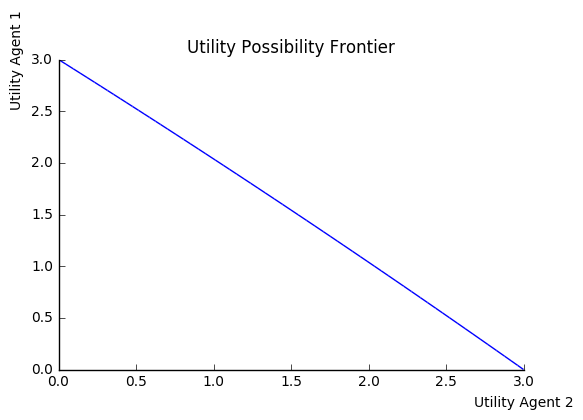

In [16]:
U1_opt = u_1.subs({x11:x11_1,x12:x12_1})
UPF = plot(U1_opt,(u2,0,3), title=('Utility Possibility Frontier')
           ,xlabel=('Utility Agent 2'),ylabel=('Utility Agent 1'))
